# Electric Cars Analysis

## Electric Cars Companies  
#### RIVN - Rivian Automotive, Inc.    
#### LCID - Lucid Group, Inc.      
#### GM - General Motors Company    
#### F - Ford Motor Company    
#### HMC - Honda Motor Co., Ltd.   

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import statistics
from tabulate import tabulate
from scipy.stats import norm

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

In [2]:
# input
symbols = ['RIVN', 'LCID', 'GM', 'F', 'HMC']
start = '2021-12-01'
end = '2022-09-02'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  5 of 5 completed


,F,GM,HMC,LCID,RIVN
Date,,,,,
2021-12-01,19.160006,57.927746,27.730000,51.139999,115.690002
2021-12-02,19.443787,60.881001,28.410000,48.410000,110.769997
2021-12-03,18.729445,59.573986,28.219999,47.270000,104.669998
2021-12-06,18.807726,59.703690,28.330000,44.860001,116.779999
2021-12-07,19.531855,61.389839,28.889999,43.880001,116.180000


In [3]:
df.tail()

,F,GM,HMC,LCID,RIVN
Date,,,,,
2022-08-26,15.41,39.140636,26.340000,16.24,32.110001
2022-08-29,15.57,39.419998,26.799999,16.17,32.310001
2022-08-30,15.45,39.130001,26.650000,15.15,31.889999
2022-08-31,15.24,38.209999,26.520000,15.34,32.709999
2022-09-01,15.19,38.560001,26.120001,15.38,31.950001


In [4]:
Number_of_Stocks = len(symbols)
Number_of_Stocks

5

In [5]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [6]:
months = (d2.year - d1.year) * 12 + (d2.month - d1.month)
months

9

In [7]:
days = (df.index[-1] - df.index[0]).days
days

274

In [8]:
delta = d1 - d2
r = relativedelta.relativedelta(d1, d2)
years = relativedelta.relativedelta(d2,d1).years
months = (r.months + (12*r.years))


print("Years of Investing: %s" % years)
print("Months of Investing: %s" % -months)
print("Days of Investing: %s" % -delta.days)

Years of Investing: 0
Months of Investing: 9
Days of Investing: 275


In [9]:
d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")

diff = relativedelta.relativedelta(d2, d1)

years = diff.years
months = diff.months
days = diff.days

print('{} years {} months {} days'.format(years, months, days))

0 years 9 months 1 days


In [10]:
returns_array = df.to_numpy()

R_mean=np.zeros(5)

returns_array2=np.zeros((190,5))

nan_array= np.isnan(returns_array)    
not_nan_array = ~ nan_array
for index in range(5):
    returns_array2[:,index] = returns_array[not_nan_array[:,index]][:,index]
    
    R_mean[index]=statistics.mean(returns_array2[:,index])
print(R_mean)
#print(df.head(0))
print(returns_array2.shape)

[16.02884257 43.53326472 27.1274737  24.87936837 50.25076321]
(190, 5)


array([[<AxesSubplot:title={'center':'F'}>,
        <AxesSubplot:title={'center':'GM'}>],
       [<AxesSubplot:title={'center':'HMC'}>,
        <AxesSubplot:title={'center':'LCID'}>],
       [<AxesSubplot:title={'center':'RIVN'}>, <AxesSubplot:>]],
      dtype=object)

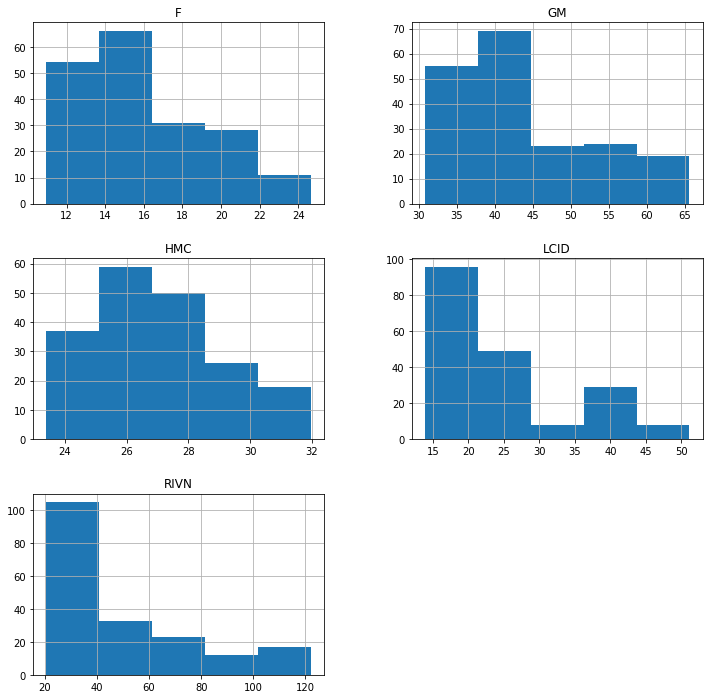

In [11]:
df.hist(bins=5, figsize=(12,12))

[ 10.79379326  83.8518085    4.23291412  76.85323027 704.66115629]


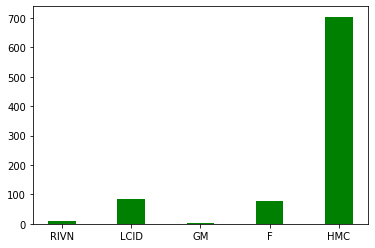

In [12]:
variances=np.zeros(5)
covarances=np.zeros(5)

for j in range(5):
    variances[j]=statistics.variance(returns_array2[:,j])
    covarances=np.cov(returns_array2[:,0],returns_array2[:,0])[0,1]  
covariances_M=np.cov(returns_array2.T)
limit_float = np.round(covariances_M, 3)
#print(returns_array2.T)
print(variances.T)

y=['RIVN', 'LCID', 'GM', 'F', 'HMC']

fig = plt.figure()
plt.bar(y,variances.T, color ='green',
        width = 0.4)
plt.show()

In [13]:
print('Percentage of invest:')
Cash = 100000
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    percentages = (round(cost,3)/Cash)*100
    print('{}: {}%'.format(i, percentages))

Percentage of invest:
F: 20.0%
GM: 20.0%
HMC: 20.0%
LCID: 20.0%
RIVN: 20.0%


In [14]:
print('Number of Shares:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x in zip(df.columns, df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    print('{}: {}'.format(i, shares))

Number of Shares:
F: 1043
GM: 345
HMC: 721
LCID: 391
RIVN: 172


In [15]:
print('Beginning Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x in zip(df.columns, df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Begin_Value = round(shares * x, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
F: $19983.89
GM: $19985.07
HMC: $19993.33
LCID: $19995.74
RIVN: $19898.68


In [16]:
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
F: $15843.17
GM: $13303.2
HMC: $18832.52
LCID: $6013.58
RIVN: $5495.4


In [17]:
print('Short Selling')
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[-1], df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Short Selling
Current Value:
F: $25214.57
GM: $30006.57
HMC: $21213.45
LCID: $66482.0
RIVN: $72306.25


In [18]:
short_result = []
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[-1], df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    short_result.append(Current_Value)
print('Total Value of Shorting: $%s' % round(sum(short_result),2))

Total Value of Shorting: $215222.84


In [19]:
print('Buy Long')
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Buy Long
Current Value:
F: $15843.17
GM: $13303.2
HMC: $18832.52
LCID: $6013.58
RIVN: $5495.4


In [20]:
long_result = []
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    long_result.append(Current_Value)
print('Total Long Value: $%s' % round(sum(long_result),2))

Total Long Value: $59487.87


In [21]:
print('Which is more profit? Long or Short?')
print('Total Value of Long: $%s' % round(sum(long_result),2))
print('Total Value of Shorting: $%s' % round(sum(short_result),2))
if sum(short_result) >= sum(long_result):
   print("Short the portfolio!")
else:
   print("Long the portfolio!")

Which is more profit? Long or Short?
Total Value of Long: $59487.87
Total Value of Shorting: $215222.84
Short the portfolio!


In [22]:
print('********Holding Period Return********') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {:.2f}%'.format(i, round(HPR,4)*100))

********Holding Period Return********
Holding Period Return: F: -20.72%
Holding Period Return: GM: -33.43%
Holding Period Return: HMC: -5.81%
Holding Period Return: LCID: -69.93%
Holding Period Return: RIVN: -72.38%


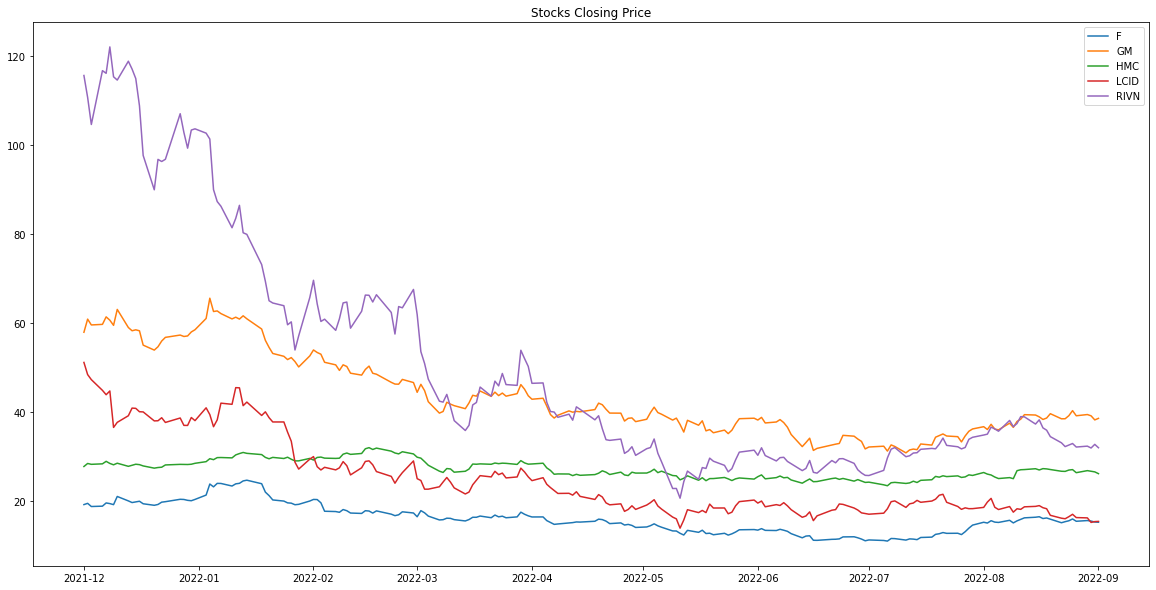

In [23]:
plt.figure(figsize=(20,10))
plt.plot(df)
plt.title('Stocks Closing Price')
plt.legend(labels=df.columns, loc='best')

In [24]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

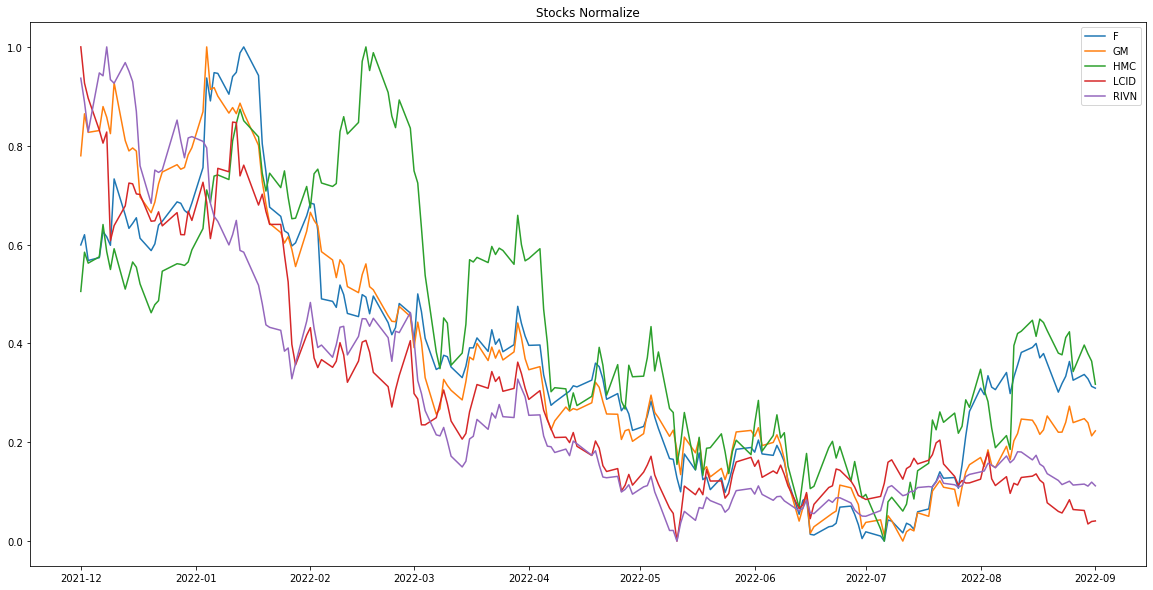

In [25]:
plt.figure(figsize=(20,10))
plt.plot(normalize)
plt.title('Stocks Normalize')
plt.legend(labels=normalize.columns, loc='best')

In [26]:
df.describe()

,F,GM,HMC,LCID,RIVN
count,190.000000,190.000000,190.000000,190.000000,190.000000
mean,16.028843,43.533265,27.127474,24.879368,50.250763
std,3.285391,9.157063,2.057405,8.766597,26.545455
min,10.950784,30.799683,23.400000,13.860000,20.600000
25%,13.374115,37.057892,25.367500,18.392499,31.450000
50%,15.665981,39.993690,26.795000,21.280001,38.190001
75%,17.783144,50.292676,28.469999,27.852500,63.639999
max,24.649670,65.590248,31.969999,51.139999,122.120003


In [27]:
df.min()

F       10.950784
GM      30.799683
HMC     23.400000
LCID    13.860000
RIVN    20.600000
dtype: float64

In [28]:
df.max()

F        24.649670
GM       65.590248
HMC      31.969999
LCID     51.139999
RIVN    122.120003
dtype: float64

In [29]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,RIVN Return,LCID Return,GM Return,F Return,HMC Return
Date,,,,,
2021-12-02,-0.042527,-0.053383,0.050982,0.014811,0.024522
2021-12-03,-0.055069,-0.023549,-0.021468,-0.036739,-0.006688
2021-12-06,0.115697,-0.050984,0.002177,0.004180,0.003898
2021-12-07,-0.005138,-0.021846,0.028242,0.038502,0.019767


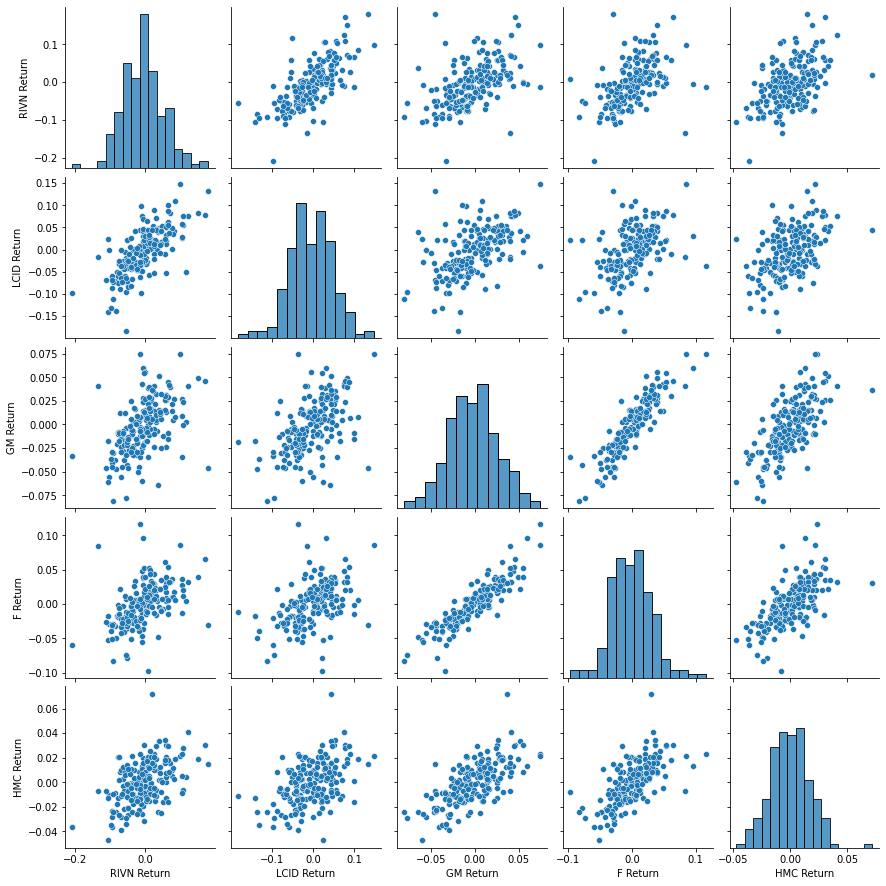

In [30]:
sns.pairplot(returns[1:])

<AxesSubplot:>

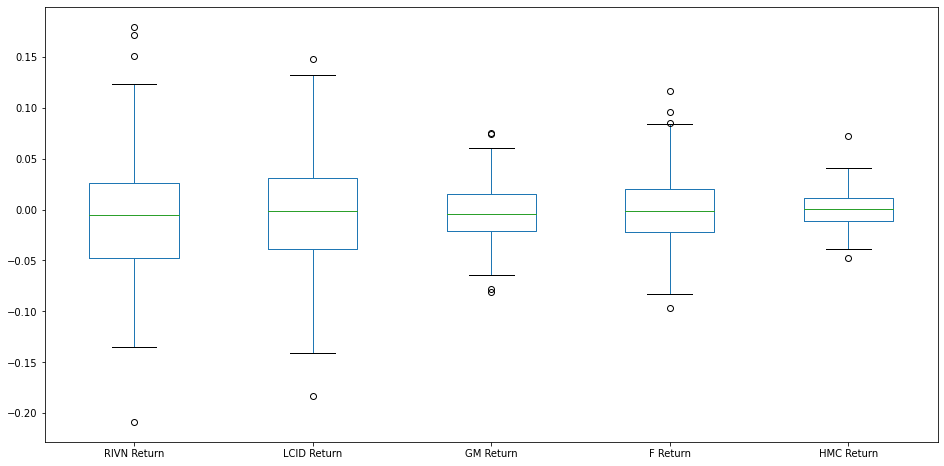

In [31]:
returns.plot(kind='box',figsize=(16,8))

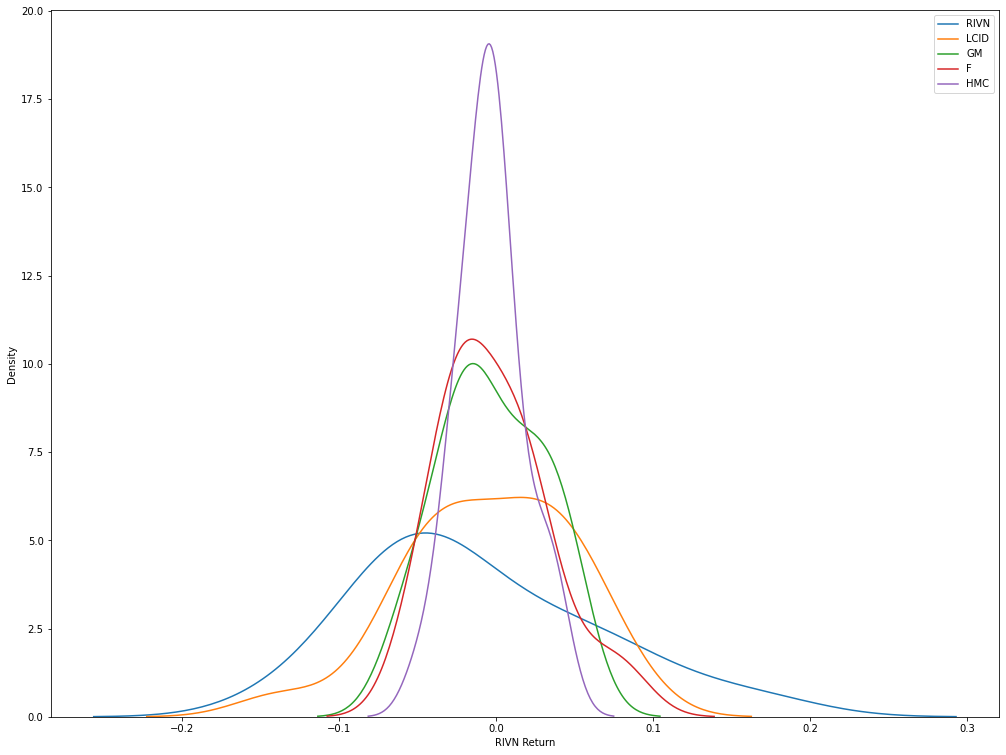

In [32]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.loc["2022-03-01" : "2022-03-31 "][r])
    plt.legend(labels=symbols)

In [33]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

RIVN Return   2022-05-12
LCID Return   2022-05-13
GM Return     2022-01-04
F Return      2022-01-04
HMC Return    2022-08-10
dtype: datetime64[ns]


In [34]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

RIVN Return   2022-05-09
LCID Return   2021-12-09
GM Return     2022-06-16
F Return      2022-02-04
HMC Return    2022-03-07
dtype: datetime64[ns]


In [35]:
returns.corr()

,RIVN Return,LCID Return,GM Return,F Return,HMC Return
RIVN Return,1.000000,0.713478,0.501319,0.491926,0.494932
LCID Return,0.713478,1.000000,0.492199,0.469229,0.460545
GM Return,0.501319,0.492199,1.000000,0.892124,0.685049
F Return,0.491926,0.469229,0.892124,1.000000,0.647018
HMC Return,0.494932,0.460545,0.685049,0.647018,1.000000


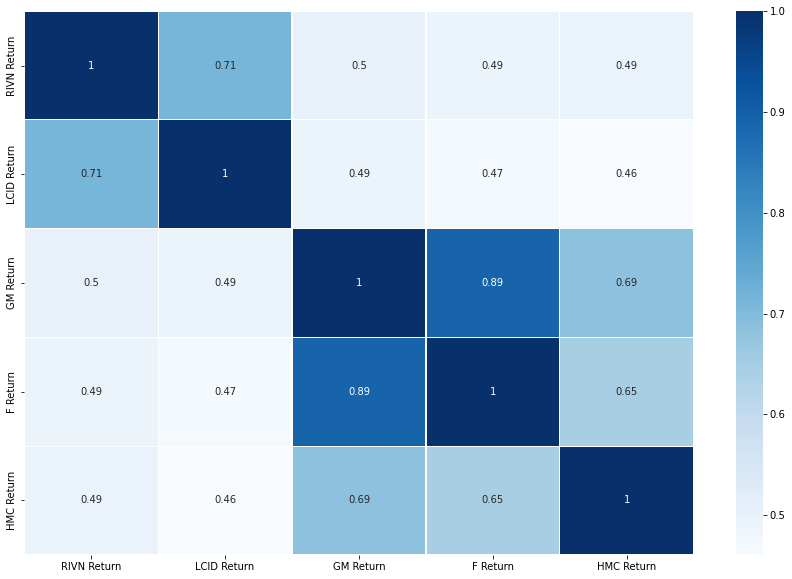

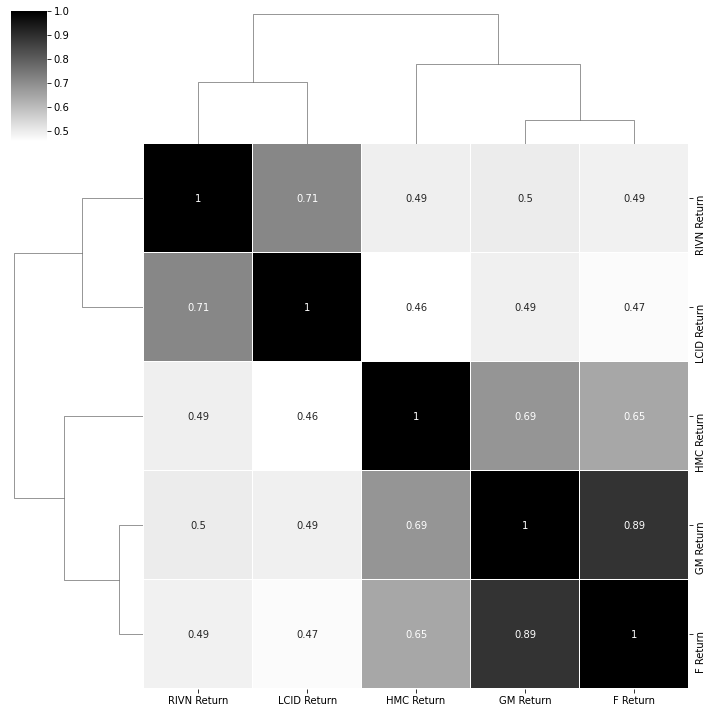

In [36]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

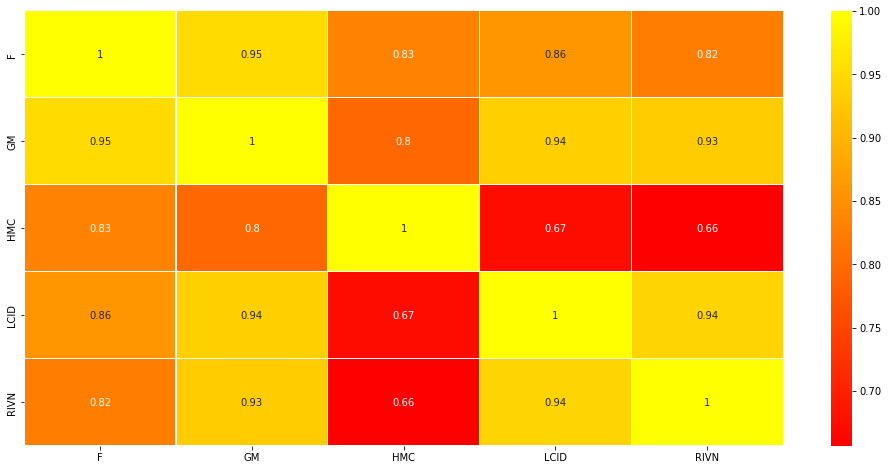

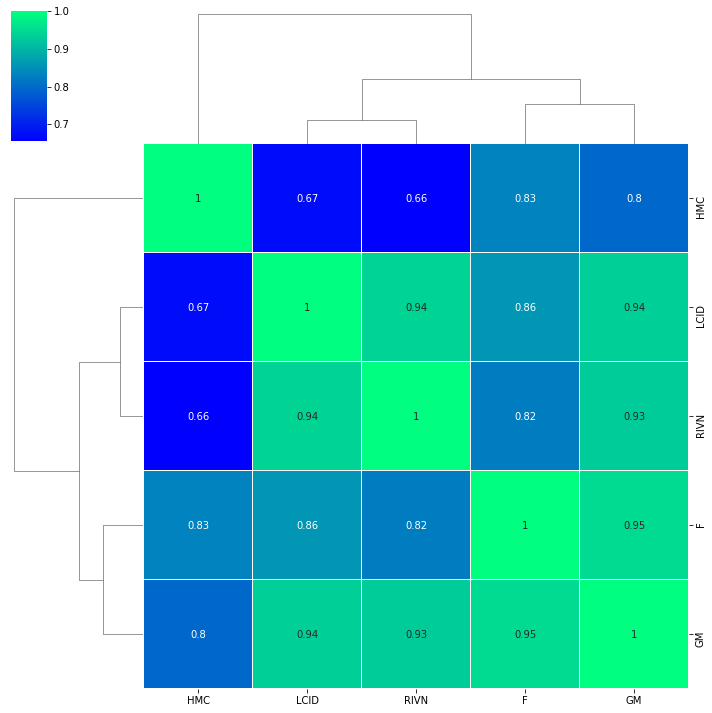

In [37]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

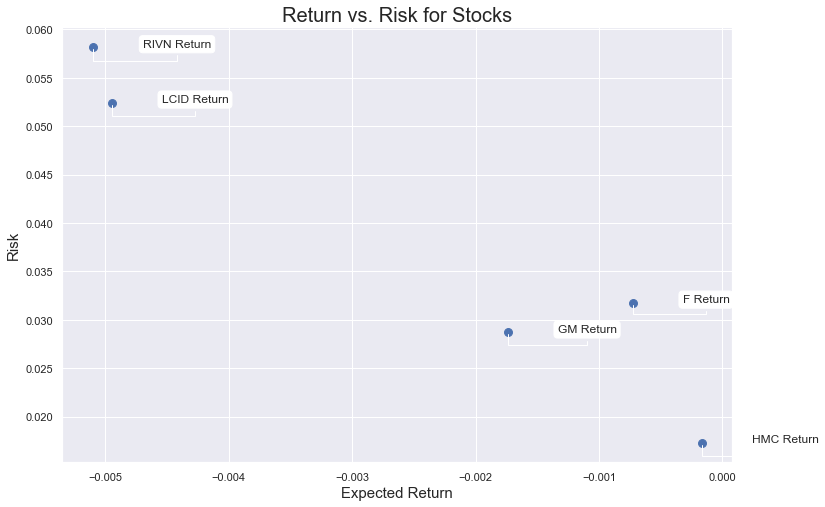

In [38]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [39]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [40]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [41]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  -------------------------------------------------------------
90%                 [-0.04134399 -0.03841938 -0.02230948 -0.07199168 -0.07945454]
95%                 [-0.05285825 -0.04881736 -0.02858644 -0.0909971  -0.10053257]
99%                 [-0.07445708 -0.06832224 -0.04036098 -0.12664809 -0.14007143]


In [42]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
F: -0.0413
GM: -0.0384
HMC: -0.0223
LCID: -0.072
RIVN: -0.0795


In [43]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${:.2f}'.format(i, -round(x,2)*100000))

Value-at-Risk Confidence Level 90%:
F: $4000.00
GM: $4000.00
HMC: $2000.00
LCID: $7000.00
RIVN: $8000.00


In [44]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${:.2f}'.format(i, -round(x,2)*100000))

Value-at-Risk Confidence Level 99%:
F: $7000.00
GM: $7000.00
HMC: $4000.00
LCID: $13000.00
RIVN: $14000.00
